# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [ ]:

#url = "https://api.openweathermap.org/data/2.5/weather?"

#city_url = f"{url}appid={weather_api_key}&q={city}"
#city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
#city_weather = requests.get(city_url).json()
#city_weather

In [ ]:
#city_lat = city_weather["coord"]["lat"]
#city_lat

#city_max_temp = city_weather["main"]["temp_max"]
#city_max_temp
#city_country = city_weather["sys"]["country"]
#city_country

#city_date = city_weather["dt"]
#city_date

#city_wind = city_weather["wind"]["speed"]
#city_wind

#city_clouds = city_weather["clouds"]["all"]
#city_clouds

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | quatre cocos
Processing Record 5 of Set 1 | nogliki
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | telemaco borba
Processing Record 9 of Set 1 | straldzha
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | meadow lakes
Processing Record 14 of Set 1 | warrnambool
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | rondonopolis
Processing Record 17 of Set 1 | dwarka
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | simpang
Processing Record 20 of Set 1 | pasuquin
Processing Record 21 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,-0.91,88,75,0.29,US,1702004422
1,castillos,-34.1667,-53.8333,14.39,86,1,3.67,UY,1702004425
2,puerto natales,-51.7236,-72.4875,8.29,90,92,1.53,CL,1702004428
3,quatre cocos,-20.2078,57.7625,27.27,75,61,2.98,MU,1702004430
4,nogliki,51.8333,143.1667,-6.48,94,100,6.71,RU,1702004432


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-0.91,88,75,0.29,US,1702004422
1,castillos,-34.1667,-53.8333,14.39,86,1,3.67,UY,1702004425
2,puerto natales,-51.7236,-72.4875,8.29,90,92,1.53,CL,1702004428
3,quatre cocos,-20.2078,57.7625,27.27,75,61,2.98,MU,1702004430
4,nogliki,51.8333,143.1667,-6.48,94,100,6.71,RU,1702004432


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

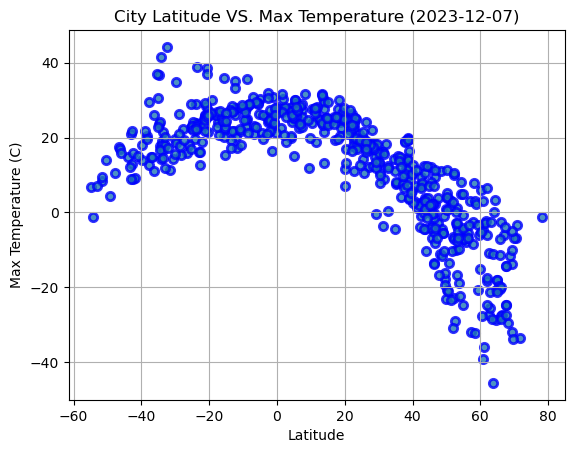

In [8]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
                         alpha=0.8, edgecolors='b', linewidths=2)



# Plot labels
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude VS. Max Temperature (2023-12-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plt
plt.show()

#### Latitude Vs. Humidity

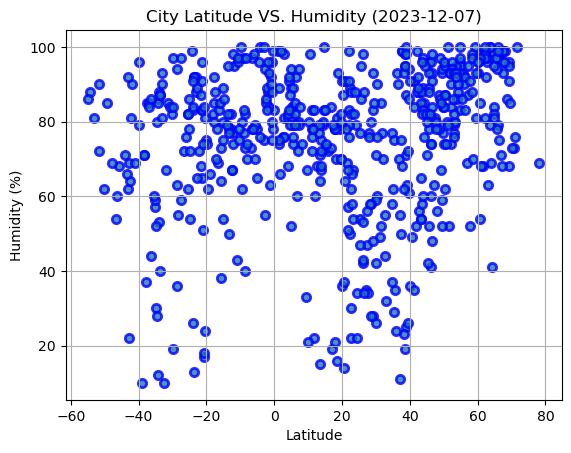

In [9]:
#Build scatter plots for Latitude vs Humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
                         alpha=0.8, edgecolors='b', linewidths=2)



# Plot Labels
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude VS. Humidity (2023-12-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

#Show the plot
plt.show()



#### Latitude Vs. Cloudiness

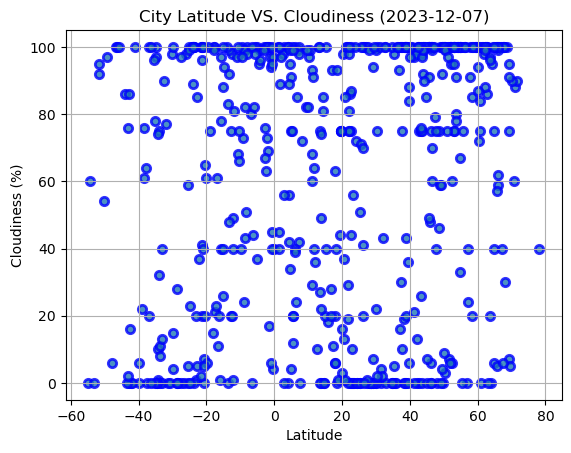

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
                         alpha=0.8, edgecolors='b', linewidths=2)



# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude VS. Cloudiness (2023-12-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

#Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

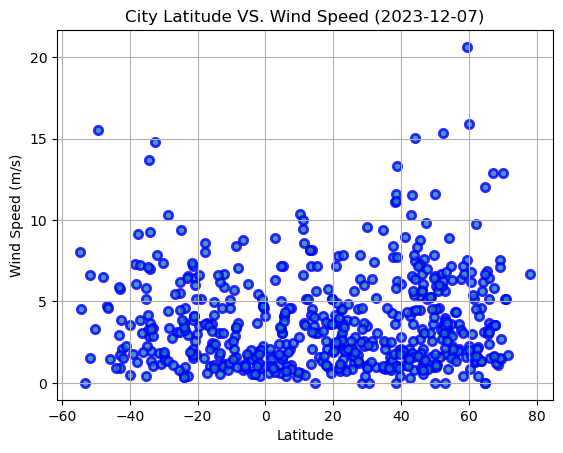

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
                         alpha=0.8, edgecolors='b', linewidths=2)



# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude VS. Wind Speed (2023-12-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

#Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


import scipy.stats as st

#print(f"The correlation between city latitude and max temp is {round(st.pearsonr(city_data_df['Lat'], city_data_df['Max Temp'])[0],2)}")

lat_max_temp = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Max Temp'])[0],2)}")
lat_humidity = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Humidity'])[0],2)}")
lat_cloudiness = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Cloudiness'])[0],2)}")
lat_windspeed = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Wind Speed'])[0],2)}")

In [13]:
#northern_hem = city_data_df.groupby("City_ID")["Lat"] >= 0
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,["City", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]
#northern_hemi_df = pd.DataFrame(northern_hemi, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-0.91,88,75,0.29,US,1702004422
4,nogliki,51.8333,143.1667,-6.48,94,100,6.71,RU,1702004432
5,whitehorse,60.7161,-135.0538,-4.57,85,75,6.17,CA,1702004435
7,straldzha,42.6000,26.6833,7.02,88,100,4.10,BG,1702004442
8,isafjordur,66.0755,-23.1240,-2.60,79,59,3.65,IS,1702004423
...,...,...,...,...,...,...,...,...,...
559,zhezqazghan,47.7833,67.7667,-16.68,78,40,7.00,KZ,1702005582
560,khilok,51.3674,110.4676,-23.46,79,97,6.01,RU,1702005583
563,enewetak,11.3474,162.3373,27.81,78,91,8.59,MH,1702005043


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[city_data_df['Lat'] < 0,["City", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castillos,-34.1667,-53.8333,14.39,86,1,3.67,UY,1702004425
2,puerto natales,-51.7236,-72.4875,8.29,90,92,1.53,CL,1702004428
3,quatre cocos,-20.2078,57.7625,27.27,75,61,2.98,MU,1702004430
6,telemaco borba,-24.3239,-50.6156,19.72,99,100,0.59,BR,1702004427
9,fale old settlement,-9.3852,-171.2468,27.59,80,100,5.69,TK,1702004446


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.865169008828136


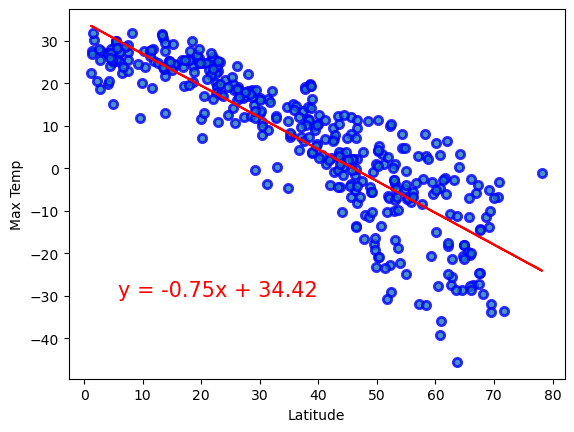

In [39]:
# Linear regression on Northern Hemisphere

print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Max Temp']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

The r-value is: 0.5358844619901817


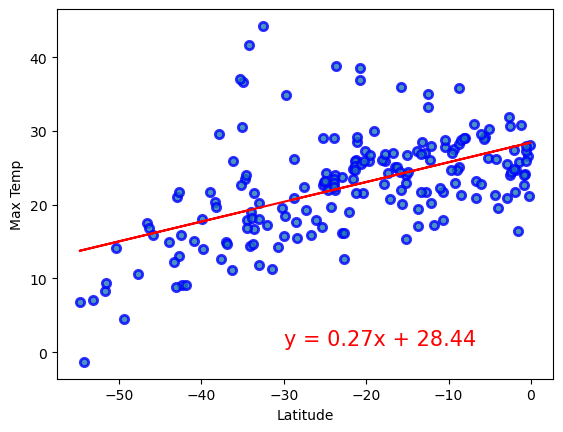

In [38]:
# Linear regression on Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hem_df['Lat'], southern_hem_df['Max Temp'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hem_df['Lat'], southern_hem_df['Max Temp']))
regress_values = (southern_hem_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem_df['Lat'], southern_hem_df['Max Temp'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

**Discussion about the linear relationship:** There appears to be a moderately positive relationship between Latitude and Max Temp in the Souther Hemisphere. As the latitude increase (or approaches 0), the Max Temp increases. In the Northern Hemisphere there is a fairly strong negative relationship between the Max Temp and an increase in Latitude. As the latitude increases, the max temp goes down. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.267190041864417


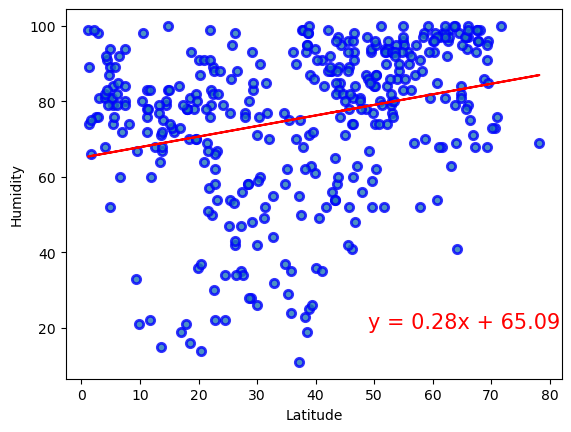

In [37]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Humidity']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(49,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

The r-value is: 0.2462408281623404


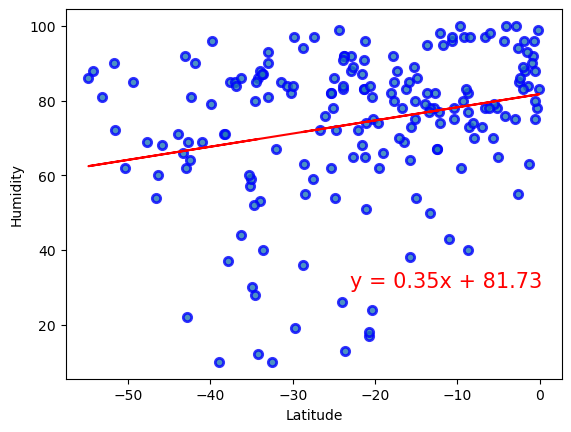

In [42]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hem_df['Lat'], southern_hem_df['Humidity'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hem_df['Lat'], southern_hem_df['Humidity']))
regress_values = (southern_hem_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem_df['Lat'], southern_hem_df['Humidity'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a weak positive correlation between Latitude and Humidity. The Southern Hemisphere has a weak positve correlation between the Latitude and Humidity. The Southern Hemisphere has a weaker correlation than the Norther Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.197257287820901


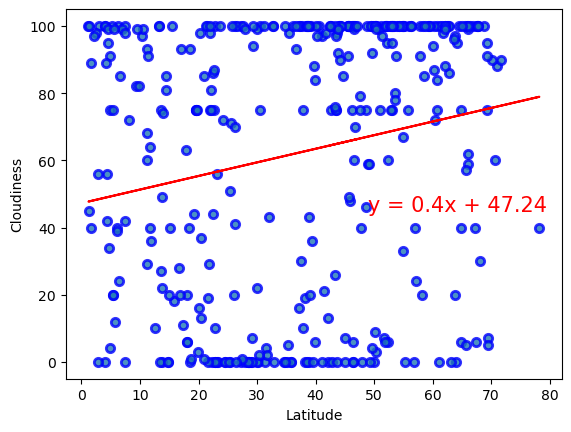

In [44]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(49,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

The r-value is: 0.2606077147750843


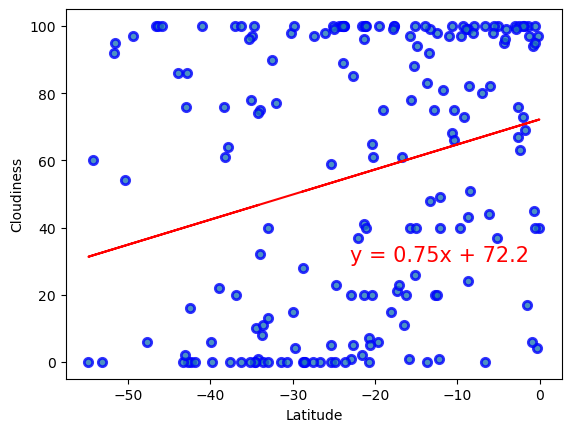

In [45]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hem_df['Lat'], southern_hem_df['Cloudiness'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hem_df['Lat'], southern_hem_df['Cloudiness']))
regress_values = (southern_hem_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem_df['Lat'], southern_hem_df['Cloudiness'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

**Discussion about the linear relationship:** There is an extremely weak positive correlation between cloudiness and latitude in the Northern Hemisphere. The line shows a very weak correlation, but the plot shows almost none. The Southern Hemisphere also has a weak positive correlation between cloudiness and latitude. Without looking at the r-value, you might think there is none based on the scatter plots. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1459162235206624


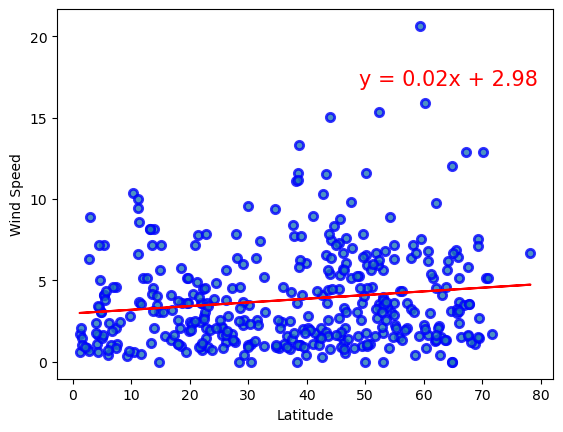

In [47]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(49,17),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

The r-value is: -0.2223194080415092


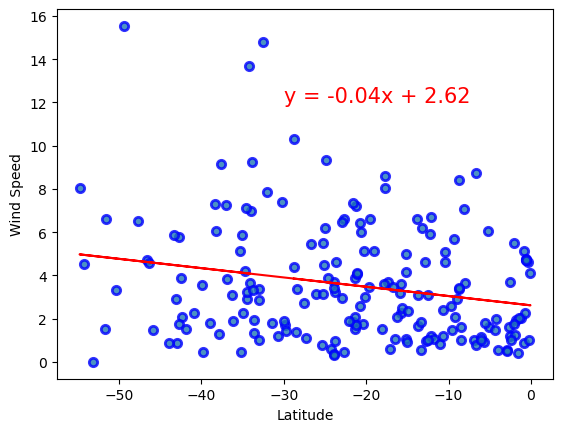

In [49]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hem_df['Lat'], southern_hem_df['Wind Speed'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hem_df['Lat'], southern_hem_df['Wind Speed']))
regress_values = (southern_hem_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem_df['Lat'], southern_hem_df['Wind Speed'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.plot(southern_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a very weak postive correlation between windspeed and latitude. The Southern Hemisphere has a weak negative correlation between wind speed and latitude. The Southern Hemisphere has a stronger negative correlation than the Norther Hemispheres positive correlation. 